# Dimension Reduction I: Eigendecomposition
### Implemented in Python

<i>Patrick White</i></br>
<i>Jan 06, 2025</i>

<img src="img/dr1.png" style="height: 450px; width:auto;">

# Outline

- Introduction
- What is Eigendecomposition?
- Finding Eigenvalues
- Finding Eigenvectors
- Python Implementation
- Numpy
- Sympy
- Scipy
- Diagonalization
- What’s Next?

# Introduction

This is the first in a series of 7 articles about dimensionality reduction techniques. It discusses eigendecomposition, a prerequisite concept to understanding several of the techniques.

- Part 1: Eigendecomposition
- Part 2: Principal Components Analysis (PCA)
- Part 3: Singular Value Decomposition (SVD)
- Part 4: Linear Discriminant Analysis (LDA)
- Part 5: Independent Component Analysis (ICA)
- Part 6: t-Stochastic Neighbors Embedding (t-SNE)
- Part 7: Uniform Manifold Approximation Projection (UMAP)

These techniques can be used to extract and combine features, such as for the purposes of clustering and visualizing data in a lower-dimensional feature space.

# What is Eigendecomposition?

Eigendecomposition is the process of finding the ‘characteristic components’, i.e., eigenvectors and eigenvalues, of a matrix, in order to express it in a more revealing form. The work ‘eigen’ is German for ‘characteristic’ or ‘own’. Eigenvectors and eigenvalues make many problems in science and engineering more tractable.

Eigenvectors indicate directions that remain invariant to transformation, which reveals directions in which the transformation acts in a simple and predictable way. Eigenvalues indicate how much the vectors indicating these directions are scaled. Geometrically, the interpretation is that a matrix-vector multiplication can have the same effect as a scalar-vector multiplication, in that the vector is not rotated, just scaled.

The fundamental eigenvalue equation gives us:

$\mathbf{Av} = \lambda \mathbf{v}$

where $\lambda$ is the scalar that acts just the same as matrix $\mathbf{A}$ upon vector $\mathbf{v}$.

Statistically, the eigenvector with the largest eigenvalue will point in the direction of maximal variance, which on a 2D scatter plot would be the line of best fit.

# Finding Eigenvalues

The way to discover the eigenvalues of a matrix is to rewrite the fundamental eigenvalue equation so that we have some expression equal to the zeros vector.

$\mathbf{Av} = \lambda \mathbf{v} = \mathbf{O}$

To make this a valid operation, we'll insert an identity matrix before the vector $\mathbf{v}$. We'll also factor the vector $\mathbf{v}$ out of both terms on the left.

$(\mathbf{A} - \lambda \mathbf{I}) \mathbf{v} = \mathbf{O}$

We'll ignore the trivial case where $\mathbf{v} = \mathbf{O}$.

Any square matrix with a non-trivial null space is reduced rank, and a reduced-rank matrix has a determinant of 0, so the mechanism for finding eigenvalues is $|\mathbf{A} - \lambda \mathbf{I}| = 0$.

Let's consider the following matrix:

$
\begin{bmatrix}
 1 & 2 \\
 2 & 1 \\
\end{bmatrix}
$

We'll shift matrix by $\lambda \cdot \mathbf{I}$, which will consist of $\lambda$ on the diagonal elements and zeros elsewhere. Thus, we'll shift the diagonal elements of the above matrix by $\lambda$, and set the determinant equal to zero.

Then, solve to get the eigenvalues.

- $(1 - \lambda)(1 - \lambda) - (2)(2) = 0$

- $\lambda^2 - 2 \lambda - 3 = 0$

- $(\lambda - 3)(\lambda + 1) = 0$

So $\lambda_1 = 3$ and $\lambda_2 = -1$.

# Finding Eigenvectors

Once you've identified the eigenvalues, shift the matrix by each −\lambda_i and find a vector \mathbf{v}_i in the null space of that shifted matrix. This can be written in two alternative ways:

- $\mathbf{v}_i \in N(\mathbf{A} - \lambda_i ~\mathbf{I})$

- $(\mathbf{A} - \lambda_i \mathbf{I}) ~\mathbf{v}_i = \mathbf{O}$

Staying consistent with the above, we have the matrix

$\begin{bmatrix} 1 & 2 \\ 2 & 1 \\ \end{bmatrix}$

and eigenvalues $\lambda_1 = 3$ and $\lambda_2 = −1$. We'll shift the matrix by each $\lambda$, and find a vector in the null space.

- $\begin{bmatrix} 1-3 & 2 \\ 2 & 1-3 \\ \end{bmatrix} = \begin{bmatrix} -2 & 2 \\ 2 & -2 \\ \end{bmatrix}$

- $\begin{bmatrix} -2 & 2 \\ 2 & -2 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ \end{bmatrix}$

The first eigenvector, associated with $\lambda_1 = 3$, is found to be $\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}$.

We'll continue with finding the second eigenvector.

- $\begin{bmatrix} 1-(-1) & 2 \\ 2 & 1-(-1) \\ \end{bmatrix} = \begin{bmatrix} 2 & 2 \\ 2 & 2 \\ \end{bmatrix}$

- $\begin{bmatrix} 2 & 2 \\ 2 & 2 \\ \end{bmatrix} \begin{bmatrix} -1 \\ 1 \\ \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ \end{bmatrix}$

The second eigenvector, associated with $\lambda_2 = -1$, is found to be $\begin{bmatrix} -1 \\ 1 \\ \end{bmatrix}$.

# Python Implementation

## Numpy

Let’s let Python check our work above, first using what is perhaps the most popular implementation of eigendecomposition, <code>numpy.linalg.eig()</code>. We import the library, create the same matrix as used above, and then decompose it into eigenvectors and eigenvalues. The input argument is simply the matrix to decompose. Returned are two arrays, the first containing eigenvalues and the second containing eigenvectors.

In [1]:
import numpy as np

A = np.array([[1,2], [2,1]])
evals, evecs = np.linalg.eig(A)

print('eigenvalues: ', evals)
print('')
print('eigenvectors: ')
print(evecs)

eigenvalues:  [ 3. -1.]

eigenvectors: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


You might wonder if the output is sorted by eigenvalue, as this is commonly done when performing methods like PCA and SVD, and it is not clear from our problem what the behavior is. We can demonstrate using a different data matrix that the output is indeed not sorted by eigenvalue.

In [2]:
A = np.array([[3, 5], [2, 5]])
evals, evects = np.linalg.eig(A)

print('eigenvalues: ', evals)

eigenvalues:  [0.68337521 7.31662479]


What about the eigenvectors? What we arrived at mathematically were 

$\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}$ and $\begin{bmatrix} -1 \\ 1 \\ \end{bmatrix}$, 

but the Numpy function gave us 

$\begin{bmatrix} 0.707.. \\ 0.707.. \\ \end{bmatrix}$ and $\begin{bmatrix} -0.707.. \\ 0.707.. \\ \end{bmatrix}$. 

This is because Numpy normalizes the vectors to be unit length, since the eigenvalues provide the scaling information, and the eigenvectors are only meaningful in terms of direction. We can confirm this by dividing the results of the calculation by hand by the <code>numpy.linalg.norm()</code>.

In [3]:
evec1 = np.array([[1], [1]])
evec1 / np.linalg.norm(evec1)

array([[0.70710678],
       [0.70710678]])

In [4]:
evec2 = np.array([[-1], [1]])
evec2 / np.linalg.norm(evec2)

array([[-0.70710678],
       [ 0.70710678]])

## Sympy

If you don't want to see normalized eigenvectors, you can go with the <code>eigenvects</code> function of the Sympy package. The output of this function is in the form <code>(eigenvalue, algebraic_multiplicity, [eigenvectors])</code>. 

Side note about the algebraic multiplicity (simply 1 below): this refers to the number of times $\lambda$ appears as the root of the characteristic polynomial (the expression reflective of the determinant that we set to $0$). If the characteristic polynomial is $(\lambda - 3)^2 (\lambda - 5) = 0$, then the algebraic multiplicity of $\lambda=3$ is $2$ because it appears twice in the factorization.

In [5]:
import sympy as sp

A = sp.Matrix([[1,2], [2,1]])
A.eigenvects()

[(-1,
  1,
  [Matrix([
   [-1],
   [ 1]])]),
 (3,
  1,
  [Matrix([
   [1],
   [1]])])]

Note that the matrix had to be defined as a Sympy Matrix object rather than a list or a numpy array. It can be 'pretty-printed' by invoking the function used below.

In [6]:
sp.init_printing(use_unicode=True)
A.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

## Scipy

The Scipy implementation is similar to Numpy, however it includes the imaginary component of the eigenvalues by default. Though we haven't seen it thus far, eigenvalues can be complex-valued (and associated to complex-valued eigenvectors). Numpy includes the imaginary component only when it is non-zero, but Scipy's eigenvalues by default include the imaginary component of the number, ending with j.

In [7]:
import scipy

A = np.array([[1, 2], [2, 1]])
scipy.linalg.eig(A)

(array([ 3.+0.j, -1.+0.j]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

You can see that Scipy, like Numpy, normalizes the eigenvectors.

# Diagonalization

An $M \times M$ matrix contains $M$ eigenvalues and $M$ associated eigenvectors.

- $\mathbf{Av}_1 = \lambda_1 \mathbf{v}_1$
- $\mathbf{Av}_2 = \lambda_2 \mathbf{v}_2$
- $\ldots$
- $\mathbf{Av}_m = \lambda_m \mathbf{v}_m$

These equations can be more compactly represented by having each eigenvector be a column in a matrix, and having each eigenvalue be an element in a diagonal matrix.

$\mathbf{AV} = \mathbf{V \Lambda}$

The reason it is $\mathbf{V \Lambda}$ and not $\mathbf{\Lambda V}$ is so the eigenvalues scale each column of the $\mathbf{V}$ matrix, rather than each row.

$
\begin{bmatrix} v_{11} & v_{21} & v_{31} \\ v_{12} & v_{22} & v_{32} \\ v_{13} & v_{23} & v_{33} \\ \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 & 0 \\ 0 & \lambda_2 & 0 \\ 0 & 0 & \lambda_3 \\
\end{bmatrix} = \begin{bmatrix} \lambda_1 v_{11} & \lambda_2 v_{21} & \lambda_3 v_{31} \\ \lambda_1 v_{12} & \lambda_2 v_{22} & \lambda_3 v_{32} \\ \lambda_1 v_{13} & \lambda_2 v_{23} & \lambda_3 v_{33} \\ \end{bmatrix}
$

Normalizing the vectors of an eigenvectors matrix means that the product of that matrix and the same matrix transposed equal the identity matrix, $\mathbf{V}^T \mathbf{V} = \mathbf{I}$, assuming the eigenvectors are of a symmetric matrix). And if $\mathbf{V}^T \mathbf{V} = \mathbf{I}$, then $\mathbf{V}^T = \mathbf{V}^{-1}$. This gives us:

$\mathbf{A} = \mathbf{V \Lambda V}^{-1}$

assuming that the columns of $\mathbf{V}$ are linearly independent. 

This is an elegant and compact equation for eigendecomposition, but also provides conceptual insight. What we're saying is that every square matrix can be decomposed into three parts: 1) a diagonal matrix, 2) an eigenvectors matrix (set of rotations), and 3) the inverse of the eigenvectors matrix.

Regarding symmetry, the properties of diagonalization work equally well for non-symmetric matrices, but a nice property of symmetric matrices is that we always get real-valued eigenvalues (which we'll focus on exclusively going forward).

The below code illustrates how the original data matrix made square by multiplying by its transpose can be reconstructed from the matrices acquired by the decomposition. In other words, eigendecomposition is a lossless transformation.

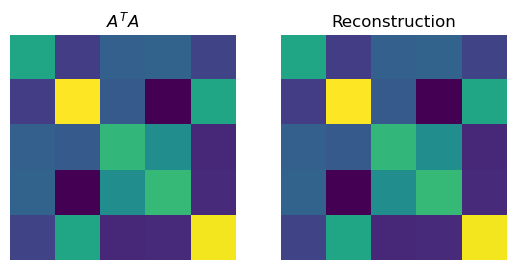

In [8]:
import matplotlib.pyplot as plt

# construct a random matrix
A = np.random.randn(5,5)*10

# multiply by transpose to make symmetrical
ATA = A.T@A

# get the eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(ATA)

# reconstruct the matrix from its components
recon = evecs @ np.diag(evals) @ np.linalg.inv(evecs)

plt.subplot(121)
plt.imshow(ATA)
plt.axis('off')
plt.title('$A^TA$')

plt.subplot(122)
plt.imshow(recon)
plt.axis('off')
plt.title('Reconstruction')

plt.show()

To prove that the two matrices above are identical, I'll subtract one from the other, resulting in zeros.

In [9]:
# subtract the reconstruction from the original (should be zero)
diff = ATA-recon
np.round(diff,8)

array([[ 0., -0., -0., -0., -0.],
       [-0., -0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0.,  0.],
       [ 0.,  0., -0., -0.,  0.],
       [-0., -0.,  0.,  0., -0.]])

The below provides a visualization of the matrix decomposed, the eigenvectors matrix $V$, the diagonalized eigenvalues matrix $\Lambda$, and the inverse of the eigenvectors matrix $V^{-1}$.

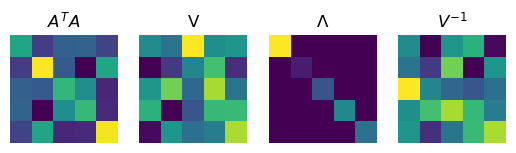

In [10]:
D, V = np.linalg.eig(ATA)

plt.subplot(141)
plt.imshow(ATA)
plt.title('$A^TA$')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()

# What's Next?

The next article in the series is on principal components analysis (PCA), which involves eigendecomposition upon a covariance matrix, and has some special properties, such as orthogonalizing components, and maximizing variance for each component under this constraint.

# References

- Cohen, M. X. (2021). Linear Algebra (1st ed.). SincXpress. 
https://sincxpress.com/books.html

- Brownlee, J. (2019). Basics of Linear Algebra for Machine Learning (2nd ed.). Machine Learning Mastery. 
https://machinelearningmastery.com/linear_algebra_for_machine_learning/

- Cohen, M. X. (2024, May 1). Complete linear algebra: Theory and implementation in code [Online Course]. Udemy. 
https://www.udemy.com/course/linear-algebra-theory-and-implementation/

- Cohen, M. X. (2024, May 1). PCA & multivariate signal processing, applied to neural data [Online Course]. Udemy. 
https://www.udemy.com/course/dimension-reduction-and-source-separation-in-neuroscience/